#**⚕️ Predicting Heart Disease Using Machine Learning ⚕️**

---

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
* Problem defination
* Data
* Evaluation
* Features
* Modelling
* Experimentation
                                        
## **1. Problem Defination**
In a Statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

##**2. Data**
The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease


There is also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

##**3. Evaluation**

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project

##**4. Features**
This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**


1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
  * 0: Typical angina: chest pain related decrease blood supply to the heart
  * 1: Atypical angina: chest pain not related to heart 
  * 2: Non-anginal pain: typically esophageal spasms (non heart related)
  * 3: Asymptomatic: chest pain not showing signs of disease

4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern

5. chol - serum cholestoral in mg/dl
  * serum = LDL + HDL + .2 * triglycerides
  * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
  * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
  * 0: Nothing to note
  * 1: ST-T Wave abnormality
    * can range from mild symptoms to severe problems
    * signals non-normal heart beat
  * 2: Possible or definite left ventricular hypertrophy
    * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
   * 0: Upsloping: better heart rate with excercise (uncommon)
  * 1: Flatsloping: minimal change (typical healthy heart)
  * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
  * colored vessel means the doctor can see the blood passing through
  * the more blood movement the better (no clots)
13. thal - thalium stress result
  * 1,3: normal
  * 6: fixed defect: used to be defect but ok now
  * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## **Preparing the Tools**
We're going to use Pandas, Matplotlib and NumPy for data analysis and manipulation.

In [1]:
#Importing all the tools we need.

#Regular EDA(Exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

##**Loading the Data**

In [2]:
# To run this whole project make sure you place the dataset in Directory and confirm it's path as mentioned below:
df= pd.read_csv("/content/drive/MyDrive/13.1 heart-disease.csv")
df.shape

(303, 14)

##**Data Exploration**
The goal is to find out more about the data and become a subject matter expert on the dataset we are working on.

1. What questions we are trying tto solve?
2. What kind of data do we have and how do we treat different data types?
3. What's missing from the data and how will we deal with it?
4. Where are the outliners and why should we care about them?
5. How can we add,change or remove features to get more out of our data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

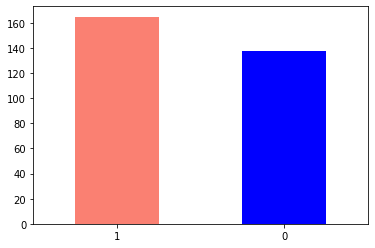

In [5]:
df.target.value_counts().plot(kind= "bar", color= ["salmon","blue"]);
plt.xticks(rotation=0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
#Are there any missing Values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## **Heart Disease Frequency According to Sex**

In [9]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
#Compare target column with sex column.
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


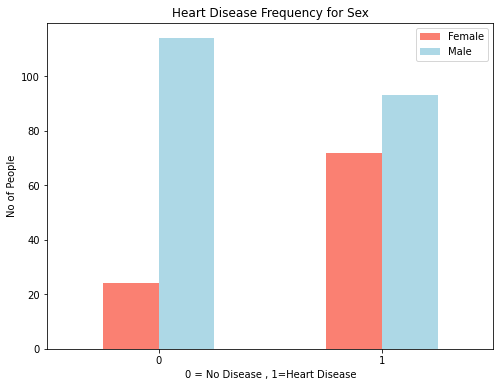

In [11]:
#Create a plot of Cross tab
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(8,6),color=["salmon","lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease , 1=Heart Disease")
plt.ylabel("No of People")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

In [12]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

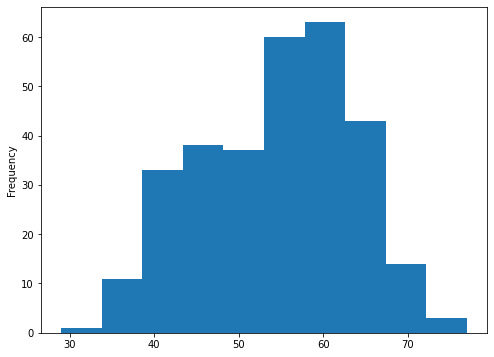

In [13]:
df.age.plot(kind="hist",figsize=(8,6));

##**Heart Disease Frequency per Chest Pain Type**
3. cp - chest pain type
  * 0: Typical angina: chest pain related decrease blood supply to the heart
  * 1: Atypical angina: chest pain not related to heart 
  * 2: Non-anginal pain: typically esophageal spasms (non heart related)
  * 3: Asymptomatic: chest pain not showing signs of disease

In [14]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


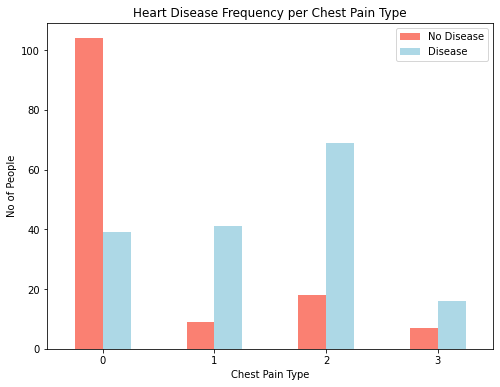

In [15]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize= (8,6),
                                  color=["salmon","lightblue"])
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("No of People")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);

In [16]:
# Correalation Matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


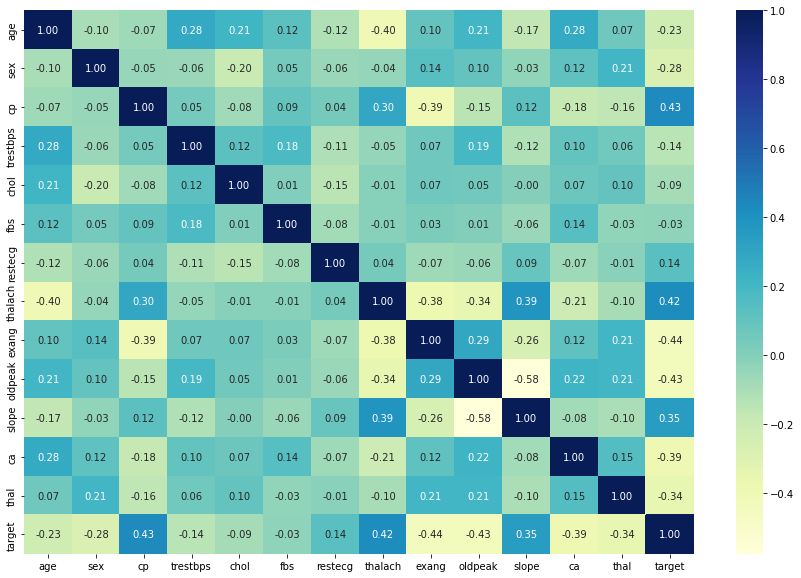

In [17]:
# Making Correalation Matrix more Understandable
corr_matrix= df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax= sns.heatmap(corr_matrix,
                annot=True,
                fmt= ".2f",
                cmap= "YlGnBu");

##**Modelling**


We've done enough EDA(we can always do more) but let's start to do some modelling.

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
#Split Data into X and Y
X= df.drop("target",axis=1)
y=df.target
#Split Data into train and test sets
np.random.seed(2)
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)
len(X_train), len(y_train), len(X_test)

(242, 242, 61)

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [20]:
# Put models in a Dictionary
models= {"Logistic Regression":LogisticRegression(),
         "KNN":KNeighborsClassifier(),
         "Random Forest":RandomForestClassifier()}
# Create a Function to fit and Score Models
def fit_and_score(models,X_train,X_test,y_train,y_test):
  """ 
  Fits and Evaluates given Machine Learning models.
  models:- A Dict of Different Scikit-learn models. 
  """
  np.random.seed(2)
  #Make a Dictionary to keep Model Scores
  model_scores={}
  #Loop throungh models
  for name,model in models.items():
    model.fit(X_train,y_train)
    model_scores[name]= model.score(X_test,y_test)
  return model_scores

In [21]:
model_scores = fit_and_score(models=models, X_train=X_train,
                           X_test=X_test,y_train=y_train,y_test=y_test)
model_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


{'KNN': 0.7049180327868853,
 'Logistic Regression': 0.9016393442622951,
 'Random Forest': 0.9016393442622951}

##**Model Comparision**

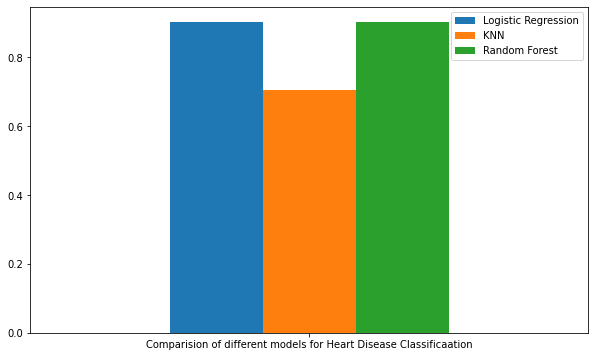

In [22]:
model_compare= pd.DataFrame(model_scores,index={"Comparision of different models for Heart Disease Classificaation"})
model_compare.plot(kind="bar",figsize=(10,6))
plt.xticks(rotation=0);

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:
1. For Every Machine learning Model:-
  * Hyperparameter tuning
  * Feature importance
2. For Classification Models Only:-
  * Confusion matrix
  * Cross-validation
  * Precision
  * Recall
  * F1 score
  * Classification report
  * ROC curve
  * Area under the curve (AUC)

##**Hyperparameter Tuning(By Hand)**

In [23]:
# Tuning KNN
train_scores=[]
test_scores=[]
# Create a list of different values of n neighbors
neighbors = range(1,30)
# Setup KNN instance
knn= KNeighborsClassifier()
# Loop through different n_neighbors
for i in neighbors:
  knn.set_params(n_neighbors=i)
  # Fit the Algorithm
  knn.fit(X_train,y_train)
  # Update the training scores list
  train_scores.append(knn.score(X_train,y_train))
  # Update the Test scores list
  test_scores.append(knn.score(X_test,y_test))
test_scores

[0.6065573770491803,
 0.639344262295082,
 0.7213114754098361,
 0.7213114754098361,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6885245901639344,
 0.7049180327868853,
 0.6885245901639344,
 0.7213114754098361,
 0.7540983606557377,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.7213114754098361,
 0.7049180327868853]

Maximum KNN Score on the test data is: 77.05%


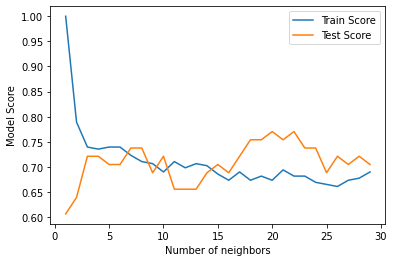

In [24]:
plt.plot(neighbors,train_scores,label="Train Score")
plt.plot(neighbors,test_scores,label="Test Score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()
print(f"Maximum KNN Score on the test data is: {max(test_scores)*100:.2f}%")

## **Hyperparameter Tuning With RandomizedSearchCV**
We're going to tune:
* LogisticRegression()
* RandomforestClassifier()

...using RandomisedSearchCV

In [25]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid= {"C":np.logspace(-4,4,20),
               "solver":["liblinear"]}
# Create a hyperparameter grid for RandomForestClassifier
rf_grid= {"n_estimators":np.arange(10,1000,50),
          "max_depth":[None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2)}

Now we've got hyperparameter grids setup for each of our models, Let's tune them using RandomisedSearchCV..

In [26]:
# Tune LogisticRegression
np.random.seed(2)
# Setup random hyperparameter search for LogicalRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [27]:
# Find the Best Parameters
rs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [28]:
rs_log_reg.score(X_test,y_test)

0.9180327868852459

In [29]:
# Tune RandomForestClassifier
np.random.seed(2)
# Setup random hyperparameter search for RandomForestClassifier
ran_for_clf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions = rf_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
# Fit random hyperparameter search model for RandomForestClassifier
ran_for_clf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [30]:
# Find the Best Parameters
ran_for_clf.best_params_

{'max_depth': None,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 660}

In [31]:
ran_for_clf.score(X_test,y_test)

0.8852459016393442

In [32]:
model_scores

{'KNN': 0.7049180327868853,
 'Logistic Regression': 0.9016393442622951,
 'Random Forest': 0.9016393442622951}

## **Hyperparameter Tuning with GridSearchCV**
Since our LogisticRegression model provides the best scores so far we'll try to improve them again using GridSearchCV...

In [33]:
#Different hyperparameters for GridSearchCV
log_reg_grid= {"C":np.logspace(-4,4,30),
               "solver": ["liblinear"]}
# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid= log_reg_grid,
                          cv=5,
                          verbose=True)
# Fit grid hyperparameter in search model
gs_log_reg.fit(X_train,y_train)
# Checking best parameters
gs_log_reg.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [34]:
# Evaluating our model
gs_log_reg.score(X_test,y_test)

0.9180327868852459

## **Evaluating our tuned Machine Learning Classifier,beyond Accuracy.**
  * ROC curve
  * Area under the curve (AUC)
  * Confusion matrix
  * Classification report
  * Cross-validation
  * Precision
  * Recall
  * F1 score



...and it would be great if we use Cross Validation where it is possible.
  
To make comparisions and evaluate our Trained model we need to make Predictions

In [35]:
# Make predictions with tuned model
y_preds= gs_log_reg.predict(X_test)
y_preds

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1])

In [36]:
y_test

99     1
296    0
89     1
30     1
234    0
      ..
173    0
94     1
161    1
216    0
91     1
Name: target, Length: 61, dtype: int64

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


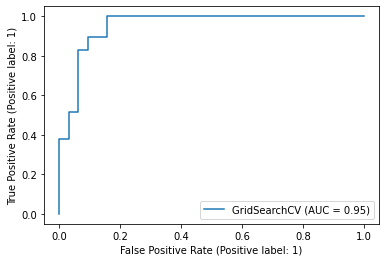

In [37]:
# Plot ROC Curve and Calculate AUC metrics
plot_roc_curve(gs_log_reg,X_test,y_test);

In [38]:
# Confusion Matrix
print(confusion_matrix(y_test,y_preds))

[[27  5]
 [ 0 29]]


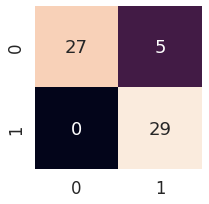

In [39]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
  """
  Plots a nice Confusion Matrix using Seaborn's Heatmap
  """
  fig,ax= plt.subplots(figsize=(3,3))
  ax= sns.heatmap(confusion_matrix(y_test,y_preds),
                annot = True,
                cbar=False)
  plt.xlabel=("Predicted Label")
  plt.ylabel=("True Label")
plot_conf_mat(y_test,y_preds)



> Now we've got a ROC curve,an AUC metric  and a Confusion Matrix, let's get a Classification Report as well as Cross-validated Precision, Recall and F1-Score



In [40]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      0.84      0.92        32
           1       0.85      1.00      0.92        29

    accuracy                           0.92        61
   macro avg       0.93      0.92      0.92        61
weighted avg       0.93      0.92      0.92        61



##**Calculating Evaluation Metrics using Cross Validation**
We're going to calculate Accuracy ,Precision ,Recall , and F1-Score of Our model using Cross-Validation and to do so we'll be using Cross_val_score().

In [41]:
# Check for Best params
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [42]:
# Create a new Classifier with best Params
clf= LogisticRegression(C=0.1082636733874054,
                       solver="liblinear")

In [43]:
# Cross-validated Accuracy
cv_acc= cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc= np.mean(cv_acc)
cv_acc

0.834808743169399

In [44]:
# Cross-validated Precision
cv_pres= cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_pres= np.mean(cv_pres)
cv_pres

0.8182683982683983

In [45]:
# Cross-validated Recall
cv_recall= cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall= np.mean(cv_recall)
cv_recall

0.9030303030303031

In [46]:
# Cross-validated F1-Score
cv_f1= cross_val_score(clf,X,y,cv=5,scoring="f1")
cv_f1= np.mean(cv_f1)
cv_f1

0.8572876223964057

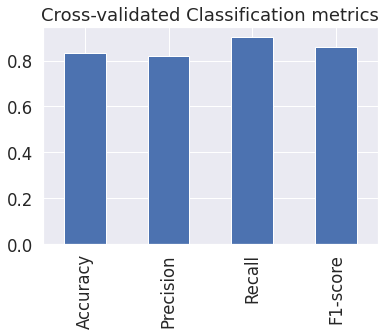

In [47]:
# Visualize Cross-validated metrics
cv_metrics= pd.DataFrame({"Accuracy":cv_acc,
                          "Precision":cv_pres,
                          "Recall":cv_recall,
                          "F1-score":cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-validated Classification metrics",legend=False)

##**Feature Importance**
  Feature importance is:
> Which Features contributed most to the outcome of the model and how did they contribute?

Finding feature importance is different for each machine learning model.

In [48]:
# Fit an instance of LogisticRegression
clf= LogisticRegression(C=0.1082636733874054,
                       solver="liblinear")
clf.fit(X_train,y_train);

In [49]:
# Check coef_
clf.coef_

array([[ 0.00647008, -0.68304127,  0.6184325 , -0.01307299, -0.00299729,
        -0.01771121,  0.24452429,  0.0243036 , -0.38642002, -0.39287514,
         0.32969957, -0.51228764, -0.48958063]])

In [50]:
# Match coef's of Features to Columns
feature_dict= dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0064700829325063484,
 'ca': -0.5122876369315944,
 'chol': -0.002997289620816121,
 'cp': 0.6184325001296853,
 'exang': -0.3864200209029064,
 'fbs': -0.01771120878786709,
 'oldpeak': -0.3928751408901576,
 'restecg': 0.24452428721064673,
 'sex': -0.6830412748635577,
 'slope': 0.3296995665707316,
 'thal': -0.489580631268462,
 'thalach': 0.024303596853501485,
 'trestbps': -0.013072986762593691}

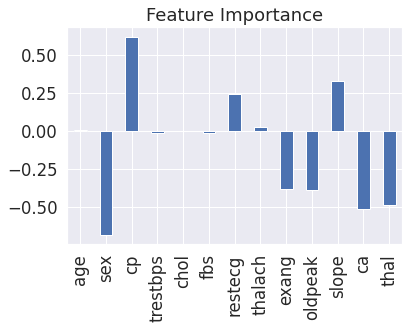

In [51]:
# Visualize feature importance
feature_df= pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [52]:
pd.crosstab(df.slope,df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


Slope of the peak exercise ST segment where:

* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart

## **For further Improvements we can Ask Questions like:**
* Could we collect more data?
* Could we try a better model? If we're working with structured data, we might want to look into CatBoost or XGBoost.
* Could we improve the current models (beyond what we've done so far)?
* If our model is good enough, how would we export it and share it with others? 

## **Saving and Loading Trained Machine Learning models**
For saving and loading of our model we will use Python's Pickle module

In [53]:
import pickle
# To save an exixting model to file in current Directory
pickle.dump(clf,open("Tuned LogisticRegression model.pkl","wb"))
# To load a Saved model
pkl_loaded_model= pickle.load(open("Tuned LogisticRegression model.pkl","rb"))